In [3]:
import pandas as pd


df = pd.read_csv('noon_products_with_details.csv')


df.head()


,Rank,Name,Site Link,Price,Old Price,Discount,Rating,Rating Count,Sponsored,Express
0,1,serenity axis sports yoga bag (unisex) …,https://www.noon.com/uae-en/serenity-axis-spor...,90,150,40% Off,NaN,NaN,y,n
1,2,serenity axis cork yoga mat (blue lotus) …,https://www.noon.com/uae-en/serenity-axis-cork...,270,450,40% Off,NaN,NaN,y,n
2,3,serenity axis female yoga bag …,https://www.noon.com/uae-en/serenity-axis-fema...,90,150,40% Off,NaN,NaN,y,n
3,4,Cool Baby Style COOLBABY Pilates Reformer Pila...,https://www.noon.com/uae-en/cool-baby-style-co...,"3,910","4,779",18% Off,NaN,NaN,n,n
4,5,Balanced Body Balanced Body METRO-IQ Reformer ...,https://www.noon.com/uae-en/balanced-body-bala...,"21,000",NaN,NaN,NaN,NaN,n,n


In [5]:
# Clean the price columns and convert to numeric
df['Price'] = df['Price'].replace({'AED': '', ',': ''}, regex=True).astype(float)
df['Old Price'] = df['Old Price'].replace({'AED': '', ',': ''}, regex=True).astype(float)

# Remove rows where price is missing or invalid
df = df.dropna(subset=['Price'])

# Check if there are any missing values
df.isnull().sum()


Rank              0
Name              0
Site Link         0
Price             0
Old Price        46
Discount         51
Rating          105
Rating Count    105
Sponsored         0
Express           0
dtype: int64

In [7]:
# Find the most expensive product
most_expensive_product = df.loc[df['Price'].idxmax()]

print("Most Expensive Product:")
print(f"Name: {most_expensive_product['Name']}")
print(f"Price: {most_expensive_product['Price']}")


Most Expensive Product:
Name: Balanced Body Balanced Body METRO-IQ Reformer Bundle – Advanced, High-Tech Pilates Reformer with Smart Features for Full-Body Fitness, Core Training, and Home or Studio Workouts …
Price: 21000.0


In [9]:
# Find the cheapest product
cheapest_product = df.loc[df['Price'].idxmin()]

print("Cheapest Product:")
print(f"Name: {cheapest_product['Name']}")
print(f"Price: {cheapest_product['Price']}")


Cheapest Product:
Name: TOEON Anti-Slip Fitness Gliding Disc 7x4inch …
Price: 18.8


In [11]:
df['Brand'] = df['Name'].apply(lambda x: x.split()[0])

# Count the number of products from each brand
brand_counts = df['Brand'].value_counts()

print("Number of Products from Each Brand:")
print(brand_counts)


Number of Products from Each Brand:
Brand
Generic      18
serenity     15
MahMir       14
GROIC        12
Longchamp     8
             ..
BRIGHTLY      1
LIMOS         1
ShebSheb      1
Adidas        1
Iron          1
Name: count, Length: 62, dtype: int64


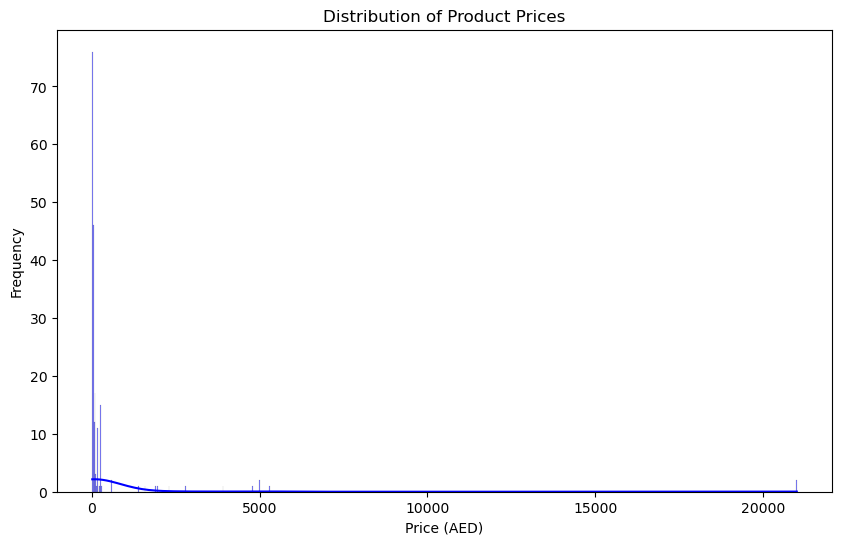

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of product prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (AED)')
plt.ylabel('Frequency')
plt.show()


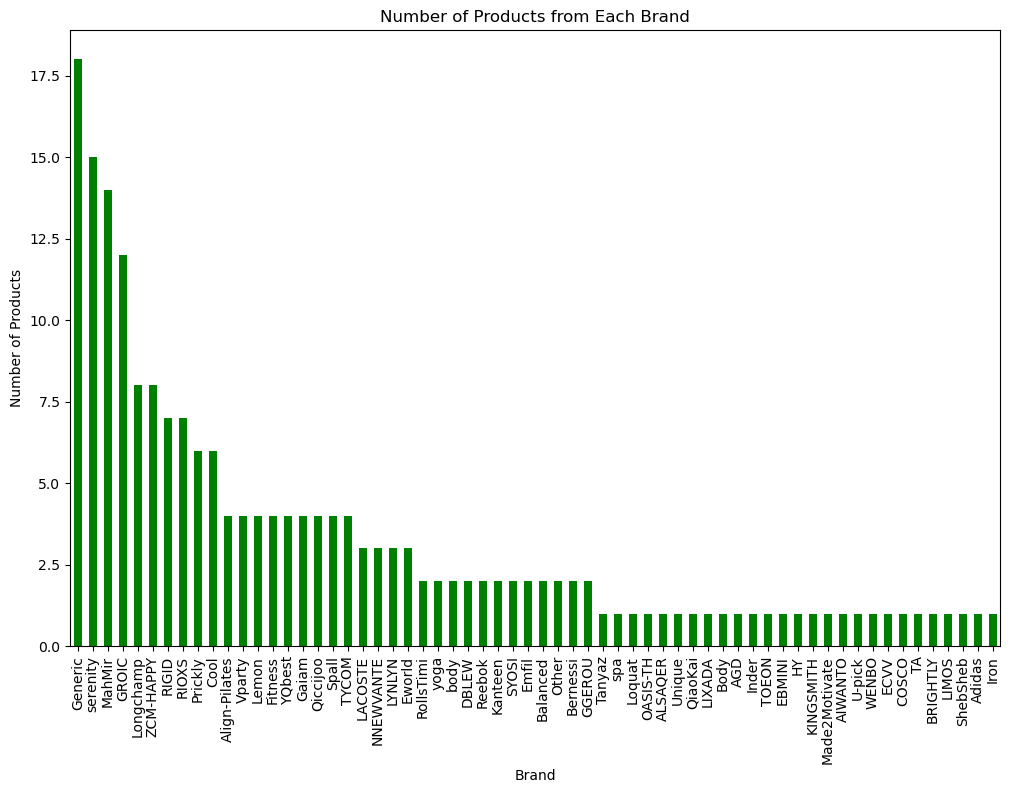

In [17]:
# Plot number of products by each brand
plt.figure(figsize=(12, 8))
brand_counts.plot(kind='bar', color='green')
plt.title('Number of Products from Each Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.show()


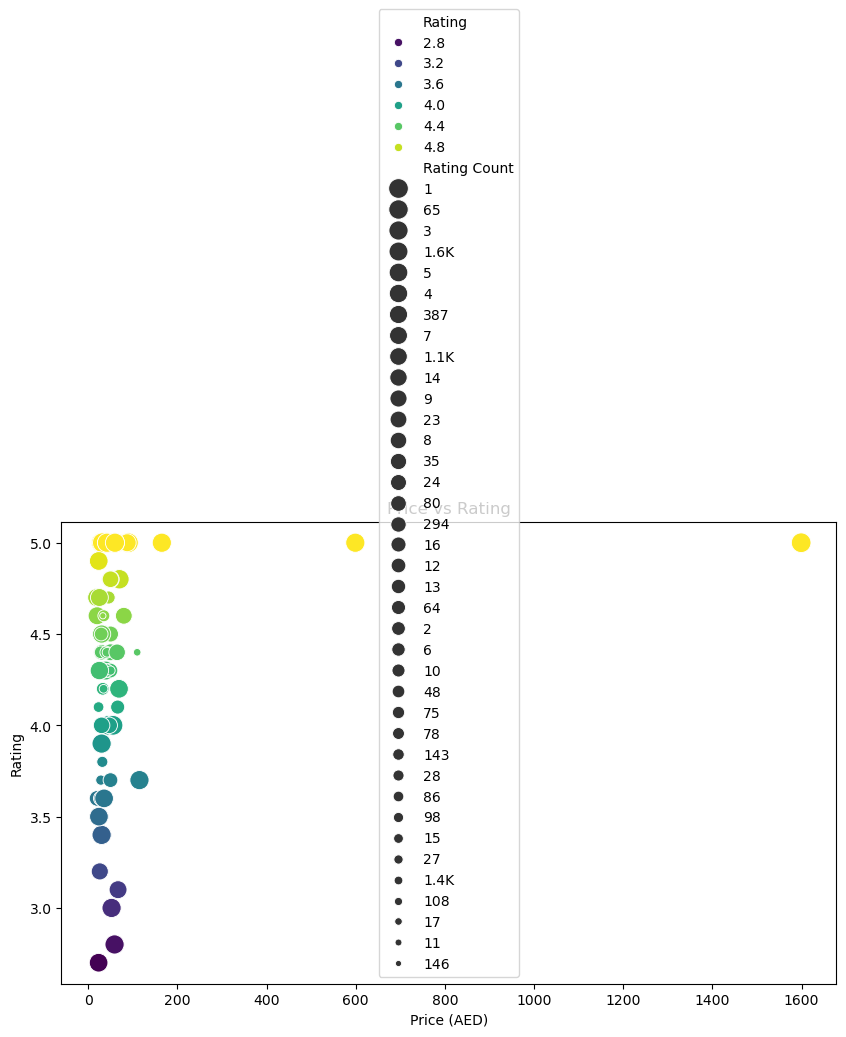

In [21]:
# Plot price vs rating to see if there's any relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Price', y='Rating', hue='Rating', palette='viridis', size='Rating Count', sizes=(20, 200))
plt.title('Price vs Rating')
plt.xlabel('Price (AED)')
plt.ylabel('Rating')
plt.show()
